### Project1

In [1]:
setwd("/home/xxzhang/data/TE/L1PA/")

In [2]:
df<-data.frame(chr=c(rep("L1HS",2),rep("L1PA2",2)),
               x=c(1,6019,1,6020),
               y=c(0,1,0,1))

In [3]:
df

chr,x,y
L1HS,1,0
L1HS,6019,1
L1PA2,1,0
L1PA2,6020,1


In [4]:
df1<-read.csv("L1HS_L1PA2.txt",stringsAsFactors = F,header=F,sep="\t")

In [1]:
library(circlize)
library(RColorBrewer)
#library(ComplexHeatmap)
col<-RColorBrewer::brewer.pal(6,"Paired")
circos.par("start.degree" = 130)
circos.initialize(factors = df$chr,x=df$x)
circos.trackPlotRegion(factors = df$chr,y=df$y,
                       panel.fun = function(x,y){
                         circos.axis()
                       },track.height = 0.1)
highlight.sector(sector.index = "L1HS",col=col[1])
highlight.sector(sector.index = "L1PA2",col=col[2])
circos.text(x=70000,y=0.5,
            labels = "L1HS",
            sector.index = "L1HS")
circos.text(x=220000,y=0.5,
            labels = "L1PA2",
            sector.index = "L1PA2",
            facing = "outside")
col_fun = colorRamp2(c(70,90,100),
                     c("green", "yellow", "red"))
for (i in 1:13){
  x<-sort(c(df1[i,8],df1[i,7]))
  y<-sort(c(df1[i,10],df1[i,9]))
  z<-df1[i,3]
  circos.link("L1HS",x,"L1PA2",y,
              col=add_transparency(col_fun(z)))
}
circos.clear()
lgd_links = Legend(at = c(70, 80, 90, 100), 
                   col_fun = col_fun, 
                   title_position = "topleft",
                   title = "identity(%)")
lgd_list_vertical = packLegend(lgd_links)

#draw(lgd_list_vertical, x = unit(10, "mm"), 
#     y = unit(10, "mm"), just = c("left", "bottom"))

circlize version 0.4.4
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: http://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization 
  in R. Bioinformatics 2014.



ERROR: Error in df$chr: 类别为'closure'的对象不可以取子集


### Project2

In [12]:
setwd("/home/xxzhang/workplace/project/CRISPRa/expression/ESC-div/TElocal/")

In [4]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [18]:
library(tidyverse)

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ readr   1.1.1
✔ tibble  1.4.2     ✔ purrr   0.2.5
✔ tidyr   0.8.1     ✔ stringr 1.2.0
✔ ggplot2 3.1.0     ✔ forcats 0.3.0
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [4]:
data<-read.table("multi_ERR5208492_ESC_1.TE.cntTable",header=T)

In [5]:
head(data)

gene.TE,X.home.xxzhang.workplace.project.CRISPRa.expression.ESC.div.STAR.multi.multi_ERR5208492_ESC_1Aligned.sortedByCoord.out.bam
(CATTC)n:(CATTC)n:Satellite:Satellite,0
(CATTC)n_dup10:(CATTC)n:Satellite:Satellite,0
(CATTC)n_dup11:(CATTC)n:Satellite:Satellite,0
(CATTC)n_dup12:(CATTC)n:Satellite:Satellite,1
(CATTC)n_dup13:(CATTC)n:Satellite:Satellite,0
(CATTC)n_dup14:(CATTC)n:Satellite:Satellite,0


In [6]:
colnames(data)<-c("TE","num")

In [9]:
#df<-data %>% filter(grepl('L1HS', TE))

In [79]:
#head(df)

In [18]:
df<-data %>% separate(TE, c("transcript","gene","family","class"),sep = ":")

In [85]:
test<-df[df$num!=0,]

In [86]:
head(test)

,transcript,gene,family,class,num
4,(CATTC)n_dup12,(CATTC)n,Satellite,Satellite,1
20,(GAATG)n,(GAATG)n,Satellite,Satellite,1
22,(GAATG)n_dup11,(GAATG)n,Satellite,Satellite,1
52,(GAATG)n_dup6,(GAATG)n,Satellite,Satellite,1
74,7SK_dup116,7SK,RNA,RNA,2
75,7SK_dup117,7SK,RNA,RNA,6


In [117]:
noZerooutput<-test%>% filter(gene%in%c("L1HS"))

In [119]:
#write.table(noZerooutput,"multi_ERR5208492_ESC_1.L1HS.txt",row.names=F)

In [15]:
countDat<-read.table("multi_ERR5208492_ESC_1.L1HS.txt",header=T)

In [44]:
dim(countDat)

[1] 509   5

In [16]:
head(countDat)

transcript,gene,family,class,num
L1HS_dup1000,L1HS,L1,LINE,1
L1HS_dup1004,L1HS,L1,LINE,3
L1HS_dup1005,L1HS,L1,LINE,17
L1HS_dup1006,L1HS,L1,LINE,1
L1HS_dup1009,L1HS,L1,LINE,4
L1HS_dup1010,L1HS,L1,LINE,1


In [121]:
gtf<-read.table("/home/xxzhang/data/Genome_reference/GTF/TE_gtf/hg38_rmsk_TE.gtf.locInd.locations",header=T)

In [8]:
gtf<-read.table("/home/xxzhang/data/Genome_reference/GTF/TE_gtf/L1HS.locInd.locations")

In [9]:
head(gtf)

V1,V2
L1HS_dup45,chr1:102230800-102231031:-
L1HS_dup46,chr1:102231032-102231475:+
L1HS_dup47,chr1:103922001-103922098:+
L1HS_dup48,chr1:103922066-103925398:+
L1HS_dup49,chr1:104035269-104035972:-
L1HS_dup50,chr1:104035973-104036669:+


In [48]:
dim(gtf)

[1] 1686    2

In [27]:
gtff<-gtf %>% separate(V2, c("chromsome","start","stop","strand"),sep = "[-|:]")

Warning message:
“Expected 4 pieces. Additional pieces discarded in 871 rows [1, 5, 7, 8, 9, 11, 19, 22, 24, 27, 28, 29, 30, 31, 33, 34, 37, 38, 39, 40, ...].”

In [28]:
head(gtff)

V1,chromsome,start,stop,strand
L1HS_dup45,chr1,102230800,102231031,
L1HS_dup46,chr1,102231032,102231475,+
L1HS_dup47,chr1,103922001,103922098,+
L1HS_dup48,chr1,103922066,103925398,+
L1HS_dup49,chr1,104035269,104035972,
L1HS_dup50,chr1,104035973,104036669,+


In [47]:
dim(gtff)

[1] 1686    6

In [29]:
colnames(gtff)[1]<-"transcript"

In [31]:
gtff$start<-as.numeric(gtff$start)

In [32]:
gtff$stop<-as.numeric(gtff$stop)

In [33]:
gtff$length<-gtff$stop-gtff$start

In [34]:
head(gtff)

transcript,chromsome,start,stop,strand,length
L1HS_dup45,chr1,102230800,102231031,,231
L1HS_dup46,chr1,102231032,102231475,+,443
L1HS_dup47,chr1,103922001,103922098,+,97
L1HS_dup48,chr1,103922066,103925398,+,3332
L1HS_dup49,chr1,104035269,104035972,,703
L1HS_dup50,chr1,104035973,104036669,+,696


In [50]:
length(gtff[gtff$length>6000,"length"])

[1] 322

In [35]:
finalDat<-merge(gtff,countDat)

In [36]:
head(finalDat)

transcript,chromsome,start,stop,strand,length,gene,family,class,num
L1HS_dup1000,chrX,58468090,58469168,+,1078,L1HS,L1,LINE,1
L1HS_dup1004,chrX,63318640,63320440,+,1800,L1HS,L1,LINE,3
L1HS_dup1005,chrX,64013268,64019286,,6018,L1HS,L1,LINE,17
L1HS_dup1006,chrX,64114184,64115120,,936,L1HS,L1,LINE,1
L1HS_dup1009,chrX,64517528,64520007,+,2479,L1HS,L1,LINE,4
L1HS_dup101,chr1,195925004,195929320,,4316,L1HS,L1,LINE,2


In [46]:
length(finalDat[finalDat$length>6000,"num"])

[1] 240

In [38]:
p1 <- ggplot(finalDat,
            aes(gene, length)) +
       geom_violin(trim=FALSE)+
       geom_boxplot(width=0.1)+
#coord_cartesian(ylim = c(0, 10))+
       stat_summary(fun.data=mean_sdl, mult=1,
                 geom="pointrange", color="red")

Warning message:
“Ignoring unknown parameters: mult”

Warning message:
“Computation failed in `stat_summary()`:
Hmisc package required for this function”

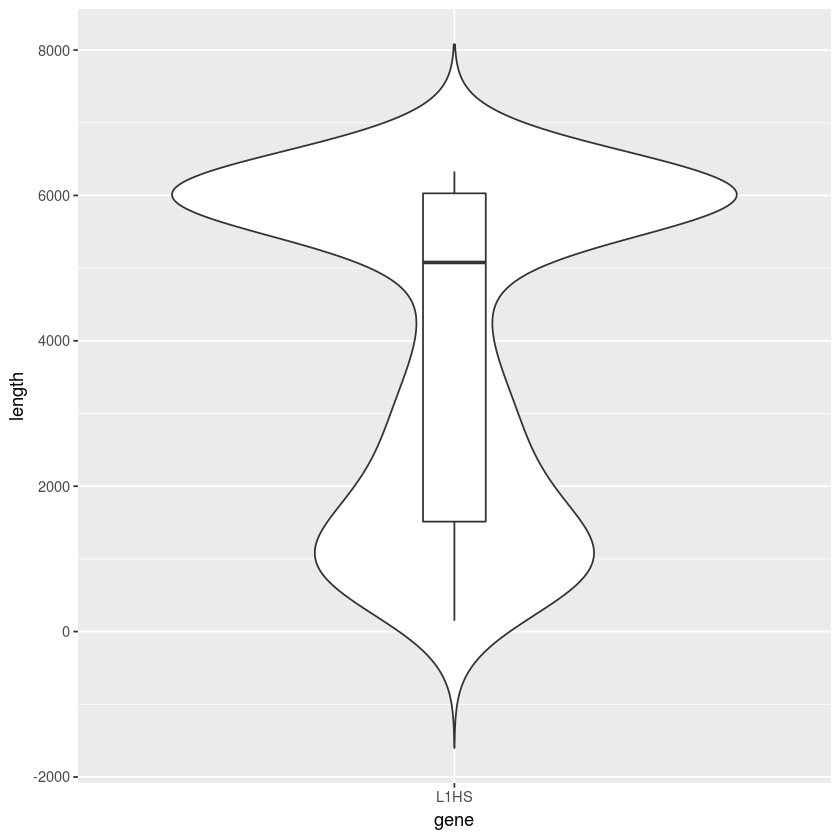

In [39]:
p1

In [110]:
p1 <- ggplot(test%>% filter(gene%in%c("L1HS","L1PA2","L1PA3","L1PA4","L1PA5","AluY","AluJo","AluSx","LTR5_Hs","L1P3b","L1MEb")),
            aes(gene, num)) +
       geom_violin(trim=FALSE)+
       geom_boxplot(width=0.1)+
coord_cartesian(ylim = c(0, 10))+
       stat_summary(fun.data=mean_sdl, mult=1,
                 geom="pointrange", color="red")

Warning message:
“Ignoring unknown parameters: mult”

In [111]:
#test[order(test$num,decreasing=TRUE),1:5]

Warning message:
“Computation failed in `stat_summary()`:
Hmisc package required for this function”

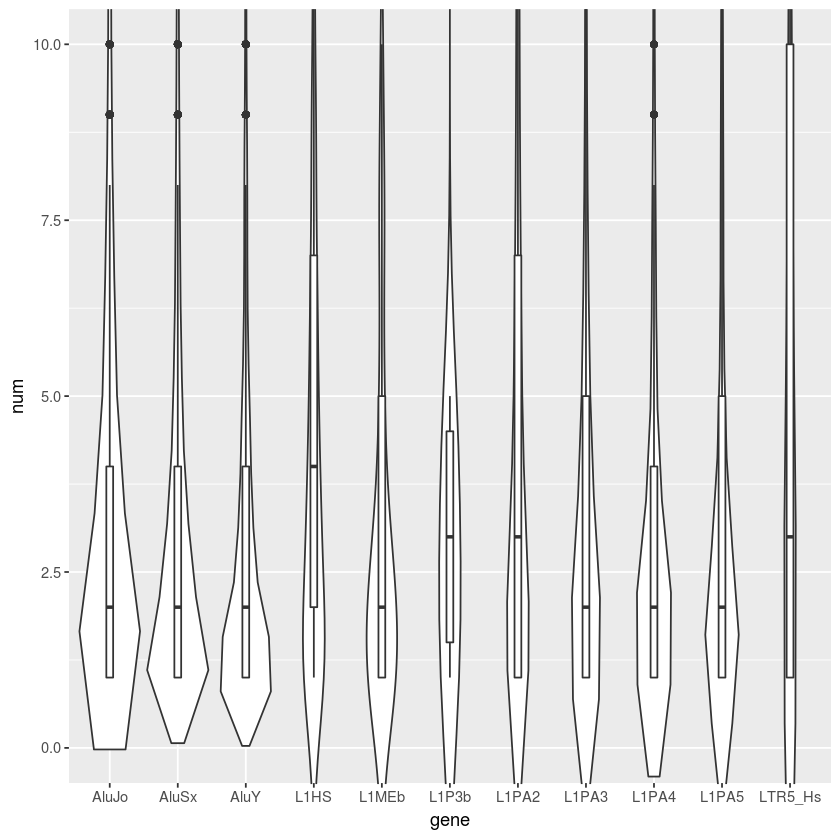

In [112]:
p1

In [33]:
CountTable<-df %>% group_by(gene) %>% summarize(notZero = sum(num!=0),total=sum(!is.na(num)))

In [34]:
#df %>% count(gene) 

In [35]:
#df %>% filter(num!=0) %>% count(gene) 

In [36]:
head(CountTable)

gene,notZero,total
(CATTC)n,1,19
(GAATG)n,3,36
7SK,25,704
ACRO1,1,86
ALR/Alpha,28,1860
Alu,157,4658


In [38]:
class(CountTable)

[1] "tbl_df"     "tbl"        "data.frame"

In [42]:
CountTable$Percentage<-CountTable$notZero/CountTable$total

In [43]:
head(CountTable)

gene,notZero,total,Percentage
(CATTC)n,1,19,0.05263158
(GAATG)n,3,36,0.08333333
7SK,25,704,0.03551136
ACRO1,1,86,0.01162791
ALR/Alpha,28,1860,0.01505376
Alu,157,4658,0.03370545


In [65]:
CountTable %>% filter(gene%in%c("L1HS","L1PA2","L1PA3","L1PA4","L1PA5","AluY","AluJo","AluSx","LTR5_Hs","L1P3b","L1MEb"))

gene,notZero,total,Percentage
AluJo,7230,81375,0.08884793
AluSx,11453,123022,0.09309717
AluY,9330,110881,0.08414426
L1HS,509,1686,0.30189798
L1MEb,108,1799,0.06003335
L1P3b,7,90,0.07777778
L1PA2,1400,5113,0.27381185
L1PA3,2062,11089,0.18595004
L1PA4,1462,12272,0.11913299
L1PA5,1344,11616,0.11570248


In [61]:
library(ggplot2)

In [66]:
p <- ggplot(CountTable %>% filter(gene%in%c("L1HS","L1PA2","L1PA3","L1PA4","L1PA5","AluY","AluJo","AluSx","LTR5_Hs","L1P3b","L1MEb")), aes(gene, Percentage)) +
geom_col(position = 'stack', width = 0.6) +
labs(x = '', y = 'Relative Abundance') +
theme(axis.text = element_text(size = 12), axis.title = element_text(size = 13)) +
theme(legend.text = element_text(size = 11))

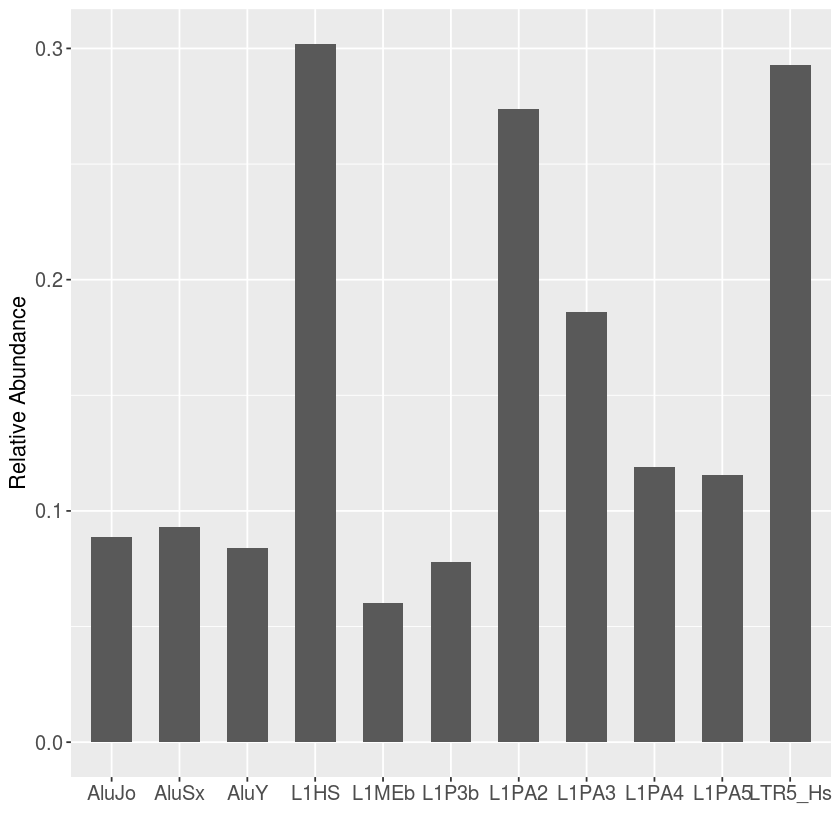

In [67]:
p

### Project3

In [1]:
#setwd("/home/xxzhang/workplace/project/CRISPRa/expression/ESC-div/TElocal/tmp/")

In [6]:
#data<-read.table("TE_8sample.cntTable",header=TRUE)

In [1]:
setwd("/home/xxzhang/workplace/project/CRISPRa/expression/ESC-div/TElocal/") #完整运行的数据

In [2]:
data<-read.table("TE.cntTable",header=TRUE)

In [3]:
head(data)

gene.TE,X.home.xxzhang.workplace.project.CRISPRa.expression.ESC.div.STAR.multi.multi_ERR5208492_ESC_1Aligned.sortedByCoord.out.bam,X.home.xxzhang.workplace.project.CRISPRa.expression.ESC.div.STAR.multi.multi_ERR5208493_ESC_1Aligned.sortedByCoord.out.bam,X.home.xxzhang.workplace.project.CRISPRa.expression.ESC.div.STAR.multi.multi_ERR5208494_ESC_1Aligned.sortedByCoord.out.bam,X.home.xxzhang.workplace.project.CRISPRa.expression.ESC.div.STAR.multi.multi_ERR5208495_ESC_1Aligned.sortedByCoord.out.bam,X.home.xxzhang.workplace.project.CRISPRa.expression.ESC.div.STAR.multi.multi_ERR5208496_ESC_1Aligned.sortedByCoord.out.bam,X.home.xxzhang.workplace.project.CRISPRa.expression.ESC.div.STAR.multi.multi_ERR5208497_ESC_1Aligned.sortedByCoord.out.bam,X.home.xxzhang.workplace.project.CRISPRa.expression.ESC.div.STAR.multi.multi_ERR5208498_ESC_1Aligned.sortedByCoord.out.bam,X.home.xxzhang.workplace.project.CRISPRa.expression.ESC.div.STAR.multi.multi_ERR5208499_ESC_1Aligned.sortedByCoord.out.bam,X.home.xxzhang.workplace.project.CRISPRa.expression.ESC.div.STAR.multi.multi_ERR5208500_ESC_1Aligned.sortedByCoord.out.bam
(CATTC)n:(CATTC)n:Satellite:Satellite,0,0,0,0,0,0,0,0,2
(CATTC)n_dup10:(CATTC)n:Satellite:Satellite,0,0,0,0,0,0,0,0,0
(CATTC)n_dup11:(CATTC)n:Satellite:Satellite,0,0,0,0,0,0,0,0,0
(CATTC)n_dup12:(CATTC)n:Satellite:Satellite,1,0,0,0,0,0,0,0,0
(CATTC)n_dup13:(CATTC)n:Satellite:Satellite,0,0,0,0,0,0,0,0,0
(CATTC)n_dup14:(CATTC)n:Satellite:Satellite,0,0,0,1,0,0,0,0,1


In [4]:
library(dplyr) #loading packages
library(tidyverse)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

── Attaching packages ────────────────────────────────────────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ readr   1.1.1
✔ tibble  1.4.2     ✔ purrr   0.2.5
✔ tidyr   0.8.1     ✔ stringr 1.2.0
✔ ggplot2 3.1.0     ✔ forcats 0.3.0
── Conflicts ───────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


#### 3.1 求在不同的样本中，指定家族中非0的比例；

In [5]:
ExtensionDat<- data %>% separate(gene.TE, c("transcript","gene","family","class"),sep = ":")

In [6]:
#head(ExtensionDat,20)

In [15]:
#table(ExtensionDat$gene)

In [53]:
#FilterDat<-ExtensionDat %>% filter(gene%in%c("L1HS","LTR5_Hs","SVA_F","SVA_E","AluYa5","AluYb8","L1PA2","L1PA3","L1PA4","L1PA5","AluY","AluJo","AluSx","(CATTC)n","(GAATG)n","L1P3b","L1MEb"))

In [7]:
FilterDat<-ExtensionDat

In [8]:
#FilterDat<-ExtensionDat %>% filter(class%in%c("DNA","SINE","LINE","LTR","Retroposon"))

In [9]:
#head(FilterDat) #对数据进行筛选，按照家族进行计数

In [10]:
#colnames(FilterDat)[5:12]<-c("ESC-1","ESC-2","ESC-3","Neuron-1","Neuron-2",
#            "Neuron-3","Neuron_pro-1","Neuron_pro-2")

In [11]:
colnames(FilterDat)[5:13]<-c("ESC-1","ESC-2","ESC-3","Neuron-1","Neuron-2",
            "Neuron-3","Neuron_pro-1","Neuron_pro-2","Neuron_pro-3")

In [12]:
#data<-read.table("TE_8sample.cntTable",header=TRUE)

In [13]:
FilterDat_long <- gather(FilterDat, key = "sample", value = "expression",
                    -`transcript`, -`gene`, -`family`, -`class`)

In [14]:
head(FilterDat_long)

transcript,gene,family,class,sample,expression
(CATTC)n,(CATTC)n,Satellite,Satellite,ESC-1,0
(CATTC)n_dup10,(CATTC)n,Satellite,Satellite,ESC-1,0
(CATTC)n_dup11,(CATTC)n,Satellite,Satellite,ESC-1,0
(CATTC)n_dup12,(CATTC)n,Satellite,Satellite,ESC-1,1
(CATTC)n_dup13,(CATTC)n,Satellite,Satellite,ESC-1,0
(CATTC)n_dup14,(CATTC)n,Satellite,Satellite,ESC-1,0


In [15]:
CountTable<-FilterDat_long %>% group_by(sample,gene) %>% summarize(notZero = sum(expression!=0),total=sum(!is.na(expression)))

In [16]:
#CountTable<-FilterDat_long %>% group_by(sample,class) %>% summarize(notZero = sum(expression!=0),total=sum(!is.na(expression)))

In [17]:
head(CountTable,20) #这个就是我们想要的结果

sample,gene,notZero,total
ESC-1,(CATTC)n,1,19
ESC-1,(GAATG)n,3,36
ESC-1,7SK,25,704
ESC-1,ACRO1,1,86
ESC-1,ALR/Alpha,28,1860
ESC-1,Alu,157,4658
ESC-1,AluJb,12869,131759
ESC-1,AluJo,7230,81375
ESC-1,AluJr,8248,88503
ESC-1,AluJr4,1784,20966


In [18]:
CountTable$Percentage<-CountTable$notZero/CountTable$total

In [21]:
write.csv(CountTable,"CountTable.csv")

In [22]:
colnames(CountTable)[2]<-"TE_subfamily"

In [28]:
head(CountTable)

sample,TE_subfamily,notZero,total,Percentage
ESC-1,(CATTC)n,1,19,0.05263158
ESC-1,(GAATG)n,3,36,0.08333333
ESC-1,7SK,25,704,0.03551136
ESC-1,ACRO1,1,86,0.01162791
ESC-1,ALR/Alpha,28,1860,0.01505376
ESC-1,Alu,157,4658,0.03370545


In [26]:
annotation<-read.csv("./DEseq2/finalDat.csv",row.names=1)

In [27]:
head(annotation)

TE_subfamily,info.x,avg_length,avg_perc_div,Freq
(A)n,Simple_repeat,23.75065,5.354792,24540
(AA)n,Simple_repeat,23.00000,0.000000,2
(AAA)n,Simple_repeat,18.50000,0.000000,2
(AAAAAAC)n,Simple_repeat,38.85714,5.494286,35
(AAAAAAG)n,Simple_repeat,42.10000,7.730000,10
(AAAAAAT)n,Simple_repeat,42.15385,7.200000,13


In [44]:
annotationDat<-merge(annotation,CountTable,by="TE_subfamily")[,c(-2,-3,-4,-5,-7,-8)]

In [47]:
annotationDat<-merge(annotation,CountTable,by="TE_subfamily")

In [57]:
write.csv(annotationDat,"heatmap.csv")

In [1]:
setwd("/home/xxzhang/workplace/project/CRISPRa/expression/ESC-div/TElocal/")

In [2]:
annotationDat<-read.csv("heatmap.csv",row.names=1)

In [3]:
head(annotationDat)

TE_subfamily,info.x,avg_length,avg_perc_div,Freq,sample,notZero,total,Percentage
(CATTC)n,Satellite,5714.176,19.35294,71,ESC-1,1,19,0.05263158
(CATTC)n,Satellite,5714.176,19.35294,71,Neuron_pro-3,2,19,0.10526316
(CATTC)n,Satellite,5714.176,19.35294,71,Neuron-1,1,19,0.05263158
(CATTC)n,Satellite,5714.176,19.35294,71,ESC-2,0,19,0.00000000
(CATTC)n,Satellite,5714.176,19.35294,71,Neuron-2,0,19,0.00000000
(CATTC)n,Satellite,5714.176,19.35294,71,ESC-3,0,19,0.00000000


In [15]:
annotationDat.2 <- aggregate(annotationDat$Percentage, by=list(annotationDat$TE_subfamily,annotationDat$avg_perc_div),mean)

In [6]:
annotationDat.2 <- aggregate(annotationDat$Percentage, by=list(annotationDat$TE_subfamily,annotationDat$avg_length),mean)

In [16]:
head(annotationDat.2)

Group.1,Group.2,x
AluYa5,3.185398,0.1137593
AluYb8,3.291881,0.1396204
L1HS,3.365601,0.3293792
L1PA2,3.629639,0.3018884
L1PA3,3.718378,0.2473222
L1PA4,4.648318,0.1768977


In [17]:
annotationDat.2

Group.1,Group.2,x
AluYa5,3.185398,0.11375927
AluYb8,3.291881,0.13962038
L1HS,3.365601,0.32937920
L1PA2,3.629639,0.30188843
L1PA3,3.718378,0.24732217
L1PA4,4.648318,0.17689773
HERV-Fc1_LTR3,5.060000,0.00000000
HERV-Fc1_LTR2,5.366667,0.37037037
L1PA5,5.537647,0.16695363
MER11D,5.591729,0.15588723


In [18]:
colnames(annotationDat.2)<-c("TE_subfamily","avg_perc_div","mean_perc")

In [23]:
annotationDat.2[annotationDat.2$mean_perc<0.1,]

,TE_subfamily,avg_perc_div,mean_perc
7,HERV-Fc1_LTR3,5.060000,0.00000000
12,MER9a1,6.082380,0.09686610
28,LTR14A,7.753896,0.08101852
33,MER85,7.969892,0.07562724
37,LTR15,8.294249,0.09003215
46,LTR14C,8.749242,0.05028386
47,L1PA8,8.773723,0.08882521
49,AluYj4,8.831762,0.08054116
52,AluYh3,8.997762,0.09189103
53,AluYc,9.035985,0.08484638


In [9]:
colnames(annotationDat.2)<-c("TE_subfamily","avg_length","mean_perc")

In [10]:
library(ggplot2)

In [17]:
options(repr.plot.width =10, repr.plot.height =10)

In [20]:
p<-ggplot(annotationDat.2,aes(x=avg_perc_div,y=mean_perc))+
    geom_point(size=1,shape=15)+
    geom_smooth(method=lm)+
    theme_minimal()

In [13]:
p<-ggplot(annotationDat.2,aes(x=avg_length,y=mean_perc))+
    geom_point(size=1,shape=15)+
    geom_smooth(method=lm)+
    theme_minimal()

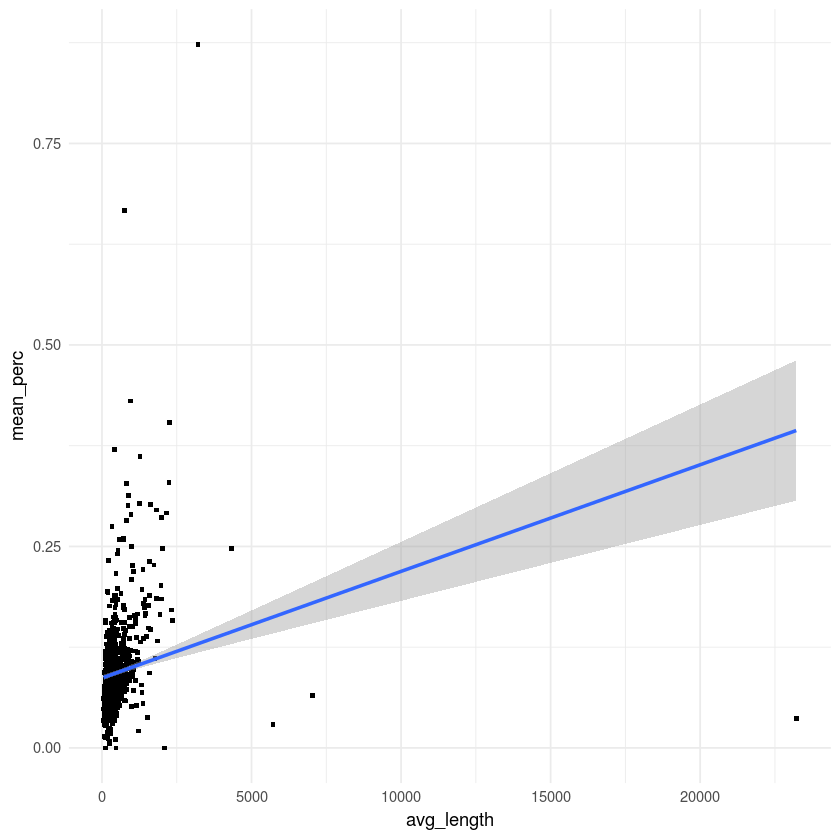

In [14]:
p

In [25]:
pdf('cor.pdf',width = 4,height = 4)
p
dev.off()

png 
  2

In [49]:
#annotationDat_wide <- annotationDat %>% 
#    spread(sample,Percentage)

In [68]:
pdf('correlaton.pdf',width = 12,height = 4)
p
dev.off()

png 
  2

In [ ]:
Pathway <- rownames(A) %>% as.data.frame() %>%
  mutate(group=rep(c("Wnt","TNF","HIF"),
                   times=c(16,17,13))) %>%
  mutate(p="")%>%
  ggplot(aes(p,.,fill=group))+
  geom_tile() + 
  scale_y_discrete(position="right") +
  theme_minimal()+xlab(NULL) + ylab(NULL) +
  theme(axis.text.y = element_blank(),
        axis.text.x =element_text(
          angle =90,hjust =0.5,vjust = 0.5))+
  labs(fill = "Pathway")

In [ ]:
p <- A %>% scale(center = T) %>% as.data.frame()
phr <- hclust(dist(p)) %>% 
  ggtree(layout="rectangular",branch.length="none")
phc <- hclust(dist(t(p))) %>% 
  ggtree() + layout_dendrogram()

In [58]:
options(repr.plot.width =10, repr.plot.height =100)

In [59]:
p1<-ggplot(annotationDat,aes(x=sample,y=TE_subfamily,fill=Percentage))+
   geom_raster()+scale_fill_gradient2(low="#003366", high="#990033", mid="white")+
   geom_tile()+
   theme_minimal()+
   theme(axis.text.x =element_text(angle =90,hjust =0.5,vjust = 0.5))+
   xlab(NULL) + ylab(NULL)+
   insert_left(Pathway, width = .05)

ERROR: Error in insert_left(Pathway, width = 0.05): 没有"insert_left"这个函数


In [60]:
p1<-ggplot(annotationDat,aes(x=sample,y=TE_subfamily,fill=Percentage))+
   geom_raster()+scale_fill_gradient2(low="#003366", high="#990033", mid="white")+
   geom_tile()+
   theme_minimal()+
   theme(axis.text.x =element_text(angle =90,hjust =0.5,vjust = 0.5))+
   xlab(NULL) + ylab(NULL)

In [3]:
#p1

In [62]:
pdf('heatmap.test.pdf',width = 12,height = 4)
p1
dev.off()

png 
  2

In [32]:
dim(annotationDat)

[1] 10539     9

In [34]:
library(pheatmap)

ERROR: Error in library(pheatmap): there is no package called ‘pheatmap’


In [48]:
#CountTable$gene<-factor(CountTable$gene,levels=c("L1HS","L1PA2","L1PA3","L1PA4","L1PA5","AluY","AluJo","AluSx","LTR5_Hs","L1P3b","L1MEb"))

In [22]:
#CountTable$gene<-factor(CountTable$gene,levels=c("L1HS","LTR5_Hs","SVA_F","SVA_E","AluYa5","AluYb8","L1PA2","L1PA3","L1PA4","L1PA5","AluY","AluJo","AluSx","(CATTC)n","(GAATG)n","L1P3b","L1MEb"))

In [23]:
#CountTable$gene<-factor(CountTable$class,levels=c("DNA","SINE","LINE","LTR","Retroposon"))

In [20]:
head(CountTable,15)

sample,gene,notZero,total,Percentage
ESC-1,(CATTC)n,1,19,0.05263158
ESC-1,(GAATG)n,3,36,0.08333333
ESC-1,7SK,25,704,0.03551136
ESC-1,ACRO1,1,86,0.01162791
ESC-1,ALR/Alpha,28,1860,0.01505376
ESC-1,Alu,157,4658,0.03370545
ESC-1,AluJb,12869,131759,0.09767075
ESC-1,AluJo,7230,81375,0.08884793
ESC-1,AluJr,8248,88503,0.09319458
ESC-1,AluJr4,1784,20966,0.08509015


In [57]:
options(repr.plot.width =20, repr.plot.height =4)

In [58]:
library(ggplot2)

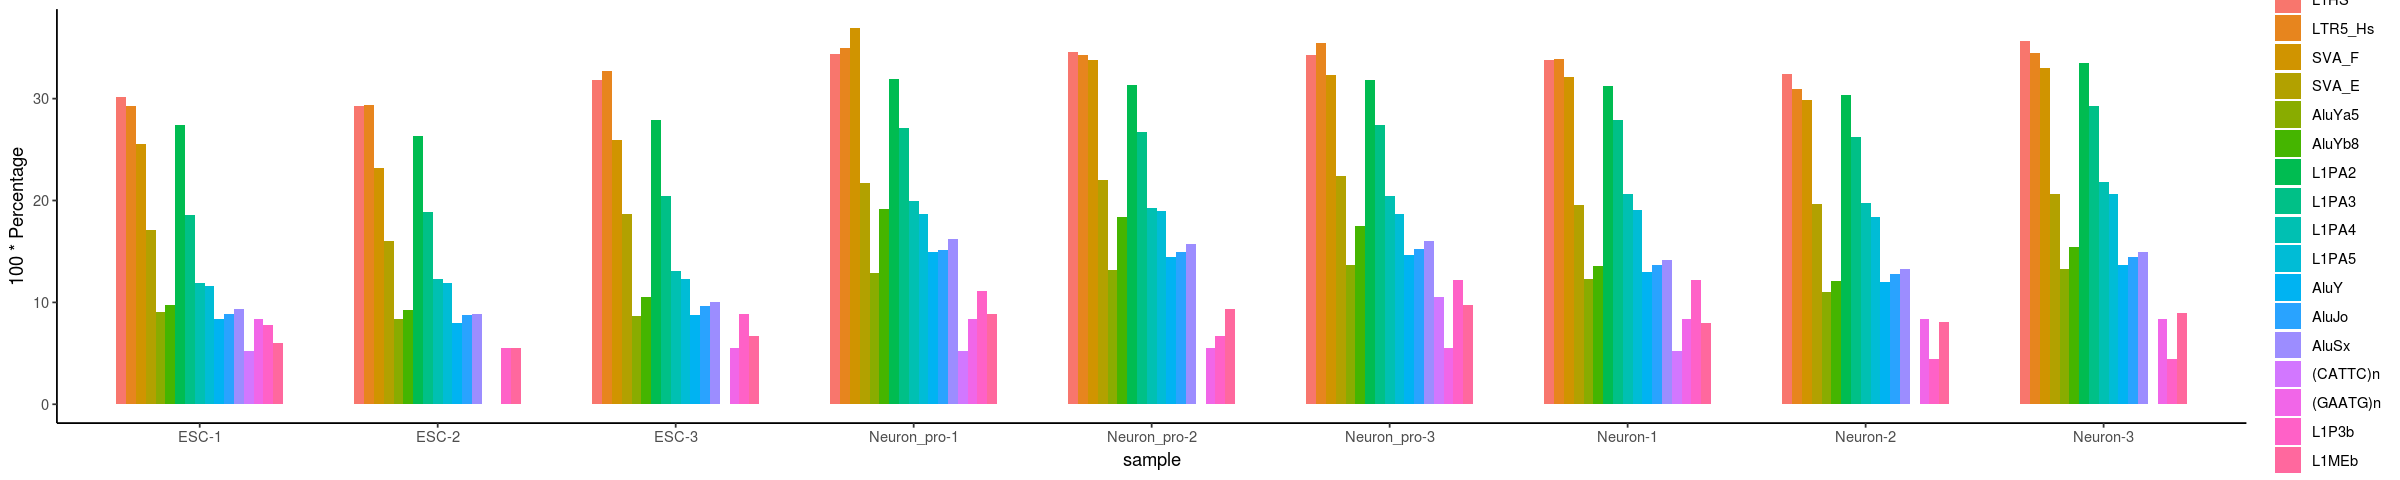

In [59]:
# ggplot(CountTable, aes(sample,100*Percentage,fill = gene))+
#     geom_col(position = 'dodge', width = 0.7)+
#     theme_classic()

In [62]:
library(RColorBrewer)

In [63]:
colourCount <-  length(unique(CountTable$gene))

In [66]:
p<-ggplot(CountTable, aes(sample,100*Percentage,fill = gene))+
    geom_col(position = 'dodge', width = 0.7) +
    labs(x = '', y = 'Relative Abundance(%)') +
    theme(axis.text = element_text(size = 12), axis.title = element_text(size = 13)) +
    theme(legend.text = element_text(size = 11))+
    theme_classic()+
    scale_fill_manual(values = colorRampPalette(brewer.pal(8, "Set2"))(colourCount))+
    theme(legend.position = "bottom" ,legend.box = "horizontal")
    #scale_fill_manual(values =  rev(c('blue', 'orange', 'green', 'yellow', 'red', 'hotpink', 'cyan','purple', 'burlywood1', 'skyblue', 'gray',
    #                                 "＃A52A2A","＃E9967A","＃FFA07A","＃DAA520","＃F0E68C","＃9ACD32"))) 
#problem occurs in the last sentence;

In [67]:
#p <- ggplot(CountTable, aes(sample,100*Percentage,fill = class))+
#    geom_col(position = 'dodge', width = 0.7) +
#    labs(x = '', y = 'Relative Abundance(%)') +
#    theme(axis.text = element_text(size = 12), axis.title = element_text(size = 13)) +
#    theme(legend.text = element_text(size = 11))+
 #   theme_classic()+
  #  scale_fill_manual(values =  rev(c('blue', 'orange', 'green', 'yellow', 'red'))) 

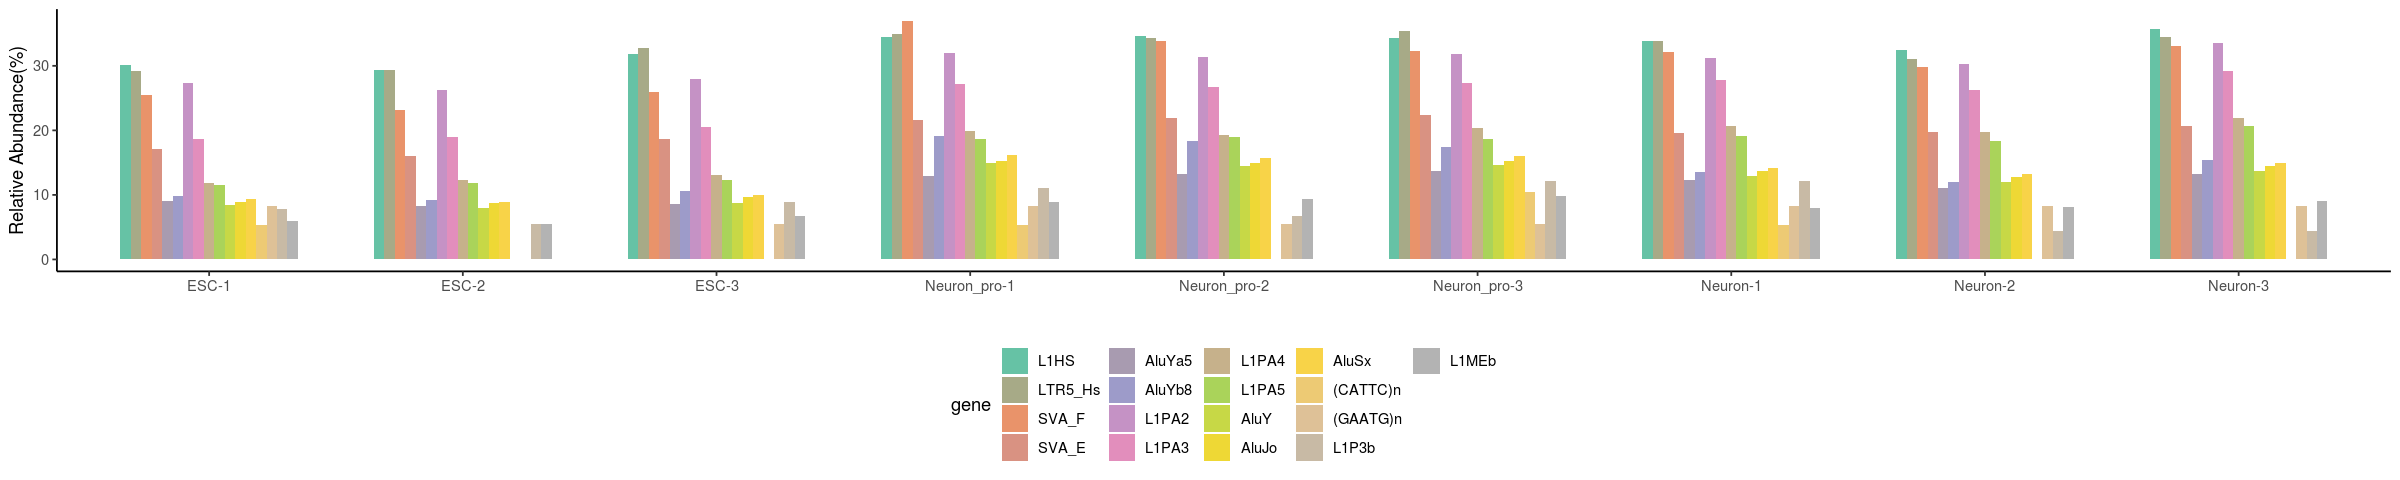

In [68]:
p

In [69]:
pdf('noZero_class-3.pdf',width = 12,height = 4)
p
dev.off()

png 
  2

> 我觉得我尚未接近最佳的解决方法；目前我只是按照自己的经验，挑选了部分的subfamily来进行展示，但是我认为这样仍然是不够完善的；目前还有哪些工作需要做：
（1）选择了低复杂度的2个序列；选择了人特异性的四个家族；
（2）只是统计了转录的位点的数目(也可以说了，这个家族中开放的位点的比例是很高的，相较于比较ancient的家族，其实那篇文字的那个图，也就是想说这个事情，但是它只是针对的L1，我感觉我可以找一下他们的源代码，怎么获取每个家族的年龄以及长度以及其它的一些信息的)；

#### 3.2 统计开放的位点的长度具有怎样的特征-以L1HS为例

In [3]:
#gtf<-read.table("/home/xxzhang/data/Genome_reference/GTF/TE_gtf/L1HS.locInd.locations")
gtf<-read.table("/home/xxzhang/data/Genome_reference/GTF/TE_gtf/L1PA2.locInd.locations")
gtff<-gtf %>% separate(V2, c("chromsome","start","stop","strand"),sep = "[-|:]")
colnames(gtff)[1]<-"transcript"
gtff$start<-as.numeric(gtff$start)
gtff$stop<-as.numeric(gtff$stop)
gtff$length<-gtff$stop-gtff$start

Warning message:
“Expected 4 pieces. Additional pieces discarded in 2561 rows [1, 2, 3, 4, 5, 7, 11, 13, 15, 16, 17, 20, 23, 27, 31, 33, 34, 35, 36, 38, ...].”

In [4]:
head(gtff)

transcript,chromsome,start,stop,strand,length
L1PA2_dup126,chr1,101115483,101115747,,264
L1PA2_dup127,chr1,102314212,102314616,,404
L1PA2_dup128,chr1,102402308,102402451,,143
L1PA2_dup129,chr1,102511033,102511927,,894
L1PA2_dup130,chr1,102928103,102934113,,6010
L1PA2_dup131,chr1,103355358,103356611,+,1253


In [11]:
head(FilterDat)

transcript,gene,family,class,ESC-1,ESC-2,ESC-3,Neuron-1,Neuron-2,Neuron-3,Neuron_pro-1,Neuron_pro-2,Neuron_pro-3
(CATTC)n,(CATTC)n,Satellite,Satellite,0,0,0,0,0,0,0,0,2
(CATTC)n_dup10,(CATTC)n,Satellite,Satellite,0,0,0,0,0,0,0,0,0
(CATTC)n_dup11,(CATTC)n,Satellite,Satellite,0,0,0,0,0,0,0,0,0
(CATTC)n_dup12,(CATTC)n,Satellite,Satellite,1,0,0,0,0,0,0,0,0
(CATTC)n_dup13,(CATTC)n,Satellite,Satellite,0,0,0,0,0,0,0,0,0
(CATTC)n_dup14,(CATTC)n,Satellite,Satellite,0,0,0,1,0,0,0,0,1


In [12]:
LengthDat<-merge(gtff,FilterDat)

In [13]:
head(LengthDat)

transcript,chromsome,start,stop,strand,length,gene,family,class,ESC-1,ESC-2,ESC-3,Neuron-1,Neuron-2,Neuron-3,Neuron_pro-1,Neuron_pro-2,Neuron_pro-3
L1PA2,chr1,49282508,49288376,+,5868,L1PA2,L1,LINE,1,1,0,4,5,1,7,0,0
L1PA2_dup1,chr1,74448282,74449467,,1185,L1PA2,L1,LINE,0,1,0,0,0,0,1,0,0
L1PA2_dup10,chr1,13715984,13716460,+,476,L1PA2,L1,LINE,0,0,0,0,0,0,1,0,2
L1PA2_dup100,chr1,86529554,86529941,,387,L1PA2,L1,LINE,0,0,1,0,0,0,0,0,0
L1PA2_dup1000,chr3,160973878,160977113,,3235,L1PA2,L1,LINE,1,0,0,0,1,0,1,0,0
L1PA2_dup1001,chr3,162379054,162381945,,2891,L1PA2,L1,LINE,3,0,0,4,0,0,3,0,0


In [14]:
LengthDat_long <- gather(LengthDat, key = "sample", value = "expression",
                    -`transcript`,-`chromsome`, -`start`, -`stop`, -`strand` ,-`length`, -`gene`, -`family`, -`class`)

In [15]:
head(LengthDat_long)

transcript,chromsome,start,stop,strand,length,gene,family,class,sample,expression
L1PA2,chr1,49282508,49288376,+,5868,L1PA2,L1,LINE,ESC-1,1
L1PA2_dup1,chr1,74448282,74449467,,1185,L1PA2,L1,LINE,ESC-1,0
L1PA2_dup10,chr1,13715984,13716460,+,476,L1PA2,L1,LINE,ESC-1,0
L1PA2_dup100,chr1,86529554,86529941,,387,L1PA2,L1,LINE,ESC-1,0
L1PA2_dup1000,chr3,160973878,160977113,,3235,L1PA2,L1,LINE,ESC-1,1
L1PA2_dup1001,chr3,162379054,162381945,,2891,L1PA2,L1,LINE,ESC-1,3


In [16]:
LengthDat_long$length<-as.numeric(LengthDat_long$length)

In [17]:
LengthDat_long$Length_label[LengthDat_long$length>6000] <-">6k"
LengthDat_long$Length_label[LengthDat_long$length<=6000 & LengthDat_long$length>4000 ] <-"4k-6k"
LengthDat_long$Length_label[LengthDat_long$length<=4000 & LengthDat_long$length>2000 ] <-"2k-4k"
#LengthDat_long$Length_label[2000<LengthDat_long$length< 4000] <-"2k-4k"
LengthDat_long$Length_label[LengthDat_long$length<= 2000] <-"<=2k"

In [18]:
LengthDat_long$Length_label<-factor(LengthDat_long$Length_label,levels=c("<=2k","2k-4k","4k-6k",">6k"))

In [50]:
#head(LengthDat_long,30)

In [26]:
options(repr.plot.width =10, repr.plot.height =4)

In [27]:
# p2 <- ggplot(LengthDat_long,
#             aes(sample, log10(expression),fill = Length_label)) +
#        #geom_violin(trim=FALSE)+
#        #geom_boxplot(width=0.1)+
#        geom_boxplot(color="lightgrey")+
#        theme_classic()+
#        # coord_cartesian(ylim = c(0, 10))+
#        # scale_fill_brewer(palette="Blues")
#        scale_fill_brewer(palette="BuGn")

In [28]:
p2 <- ggplot(LengthDat_long,
            aes(sample,log10(expression+1),fill = Length_label)) +
       #geom_violin(trim=FALSE)+
       #geom_boxplot(width=0.1)+
       geom_boxplot(color="lightgrey")+
       theme_classic()+
       #coord_cartesian(ylim = c(0, 10))+
       # scale_fill_brewer(palette="Blues")
           scale_fill_brewer(palette="BuGn")

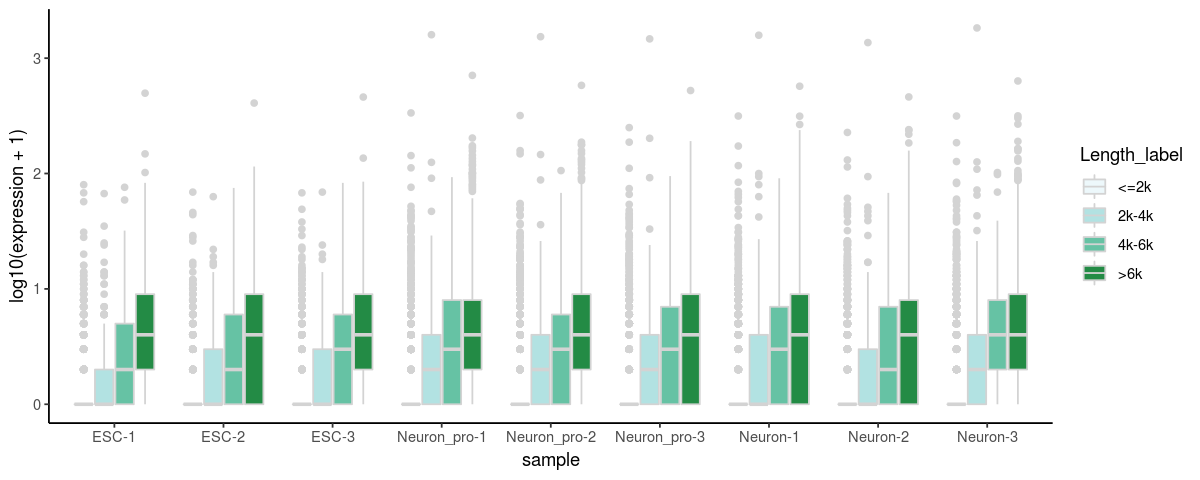

In [29]:
p2

In [41]:
# 安装devtools包（如果尚未安装）
#install.packages("devtools")

In [42]:
#library(devtools)

In [43]:
# 使用devtools包安装installr包
#devtools::install_github("talgalili/installr")

In [44]:
# 加载installr包
#library(installr)

In [45]:
# 更新R版本
#updateR()

In [47]:
#想组内进行置信度检验
#library(ggpubr)
#library(rstatix)

In [39]:
#if (!require("BiocManager", quietly = TRUE))
#    install.packages("BiocManager")
#BiocManager::install()

In [40]:
#BiocManager::install(c("ggpubr", "rstatix")

In [129]:
pdf('L1HS-Length2.pdf',width = 8,height = 4)
p2
dev.off()

png 
  2

In [48]:
pdf('L1PA2-Length2.pdf',width = 10,height = 4)
p2
dev.off()

png 
  2

#### 3.3 找各个组织，转录的L1的位点，并求取三个重复实验的交集

In [49]:
#library(DESeq2)#可能需要调整一下，这边安装不上DEseq2的原因,我感觉我可以不用在jupyter这边考虑做差异分析了；

In [61]:
head(FilterDat_long)

transcript,gene,family,class,sample,expression
(CATTC)n,(CATTC)n,Satellite,Satellite,ESC-1,0
(CATTC)n_dup10,(CATTC)n,Satellite,Satellite,ESC-1,0
(CATTC)n_dup11,(CATTC)n,Satellite,Satellite,ESC-1,0
(CATTC)n_dup12,(CATTC)n,Satellite,Satellite,ESC-1,1
(CATTC)n_dup13,(CATTC)n,Satellite,Satellite,ESC-1,0
(CATTC)n_dup14,(CATTC)n,Satellite,Satellite,ESC-1,0


In [64]:
FilterDat_noZero_L1<-FilterDat_long %>% filter(expression!=0,gene%in%c("L1HS","L1PA2","L1PA3","L1PA4"))

In [66]:
rm(FilterDat_noZero)

In [67]:
head(FilterDat_noZero_L1)

transcript,gene,family,class,sample,expression
L1HS_dup1000,L1HS,L1,LINE,ESC-1,1
L1HS_dup1004,L1HS,L1,LINE,ESC-1,3
L1HS_dup1005,L1HS,L1,LINE,ESC-1,17
L1HS_dup1006,L1HS,L1,LINE,ESC-1,1
L1HS_dup1009,L1HS,L1,LINE,ESC-1,4
L1HS_dup1010,L1HS,L1,LINE,ESC-1,1


In [69]:
FilterDat_noZero_L1$group[FilterDat_noZero_L1$sample%in%c("ESC-1","ESC-2","ESC-3")] <-"ESC"
FilterDat_noZero_L1$group[FilterDat_noZero_L1$sample%in%c("Neuron_pro-1","Neuron_pro-2","Neuron_pro-3")] <-"Neuron_pro"
FilterDat_noZero_L1$group[FilterDat_noZero_L1$sample%in%c("Neuron-1","Neuron-2","Neuron-3")] <-"Neuron"

In [70]:
head(FilterDat_noZero_L1)

transcript,gene,family,class,sample,expression,group
L1HS_dup1000,L1HS,L1,LINE,ESC-1,1,ESC
L1HS_dup1004,L1HS,L1,LINE,ESC-1,3,ESC
L1HS_dup1005,L1HS,L1,LINE,ESC-1,17,ESC
L1HS_dup1006,L1HS,L1,LINE,ESC-1,1,ESC
L1HS_dup1009,L1HS,L1,LINE,ESC-1,4,ESC
L1HS_dup1010,L1HS,L1,LINE,ESC-1,1,ESC


In [83]:
repFilterDat_noZero_L1<-FilterDat_noZero_L1 %>% count(group,transcript,gene, sort = TRUE)

In [84]:
head(repFilterDat_noZero_L1)

group,transcript,gene,n
ESC,L1HS_dup1005,L1HS,3
ESC,L1HS_dup1006,L1HS,3
ESC,L1HS_dup1012,L1HS,3
ESC,L1HS_dup1014,L1HS,3
ESC,L1HS_dup1019,L1HS,3
ESC,L1HS_dup102,L1HS,3


In [85]:
Savedfiles_repFilterDat_noZero_L1<-repFilterDat_noZero_L1 %>% filter(n==3)

In [86]:
head(Savedfiles_repFilterDat_noZero_L1)

group,transcript,gene,n
ESC,L1HS_dup1005,L1HS,3
ESC,L1HS_dup1006,L1HS,3
ESC,L1HS_dup1012,L1HS,3
ESC,L1HS_dup1014,L1HS,3
ESC,L1HS_dup1019,L1HS,3
ESC,L1HS_dup102,L1HS,3


In [88]:
table(Savedfiles_repFilterDat_noZero_L1[which(Savedfiles_repFilterDat_noZero_L1$gene=="L1HS"),]$group)


       ESC     Neuron Neuron_pro 
       276        283        292 

In [89]:
table(Savedfiles_repFilterDat_noZero_L1[which(Savedfiles_repFilterDat_noZero_L1$gene=="L1PA2"),]$group)


       ESC     Neuron Neuron_pro 
       766        836        891 

In [90]:
table(Savedfiles_repFilterDat_noZero_L1[which(Savedfiles_repFilterDat_noZero_L1$gene=="L1PA3"),]$group)


       ESC     Neuron Neuron_pro 
       855       1431       1384 

In [91]:
table(Savedfiles_repFilterDat_noZero_L1[which(Savedfiles_repFilterDat_noZero_L1$gene=="L1PA4"),]$group)


       ESC     Neuron Neuron_pro 
       586       1174       1074 

In [92]:
write.csv(Savedfiles_repFilterDat_noZero_L1,"Savedfiles_repFilterDat_noZero_L1.csv",row.names=F)

In [93]:
#gtf<-read.table("/home/xxzhang/data/Genome_reference/GTF/TE_gtf/L1HS.locInd.locations")
gtf<-read.table("/home/xxzhang/data/Genome_reference/GTF/TE_gtf/L1PA1-4.locInd.locations")
gtff<-gtf %>% separate(V2, c("chromsome","start","stop","strand"),sep = "[-|:]")
colnames(gtff)[1]<-"transcript"
gtff$start<-as.numeric(gtff$start)
gtff$stop<-as.numeric(gtff$stop)
gtff$length<-gtff$stop-gtff$start

Warning message:
“Expected 4 pieces. Additional pieces discarded in 15090 rows [1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 16, 17, 18, 22, 23, 25, 26, 30, ...].”

In [94]:
Merge_Savedfiles_repFilterDat_noZero_L1<-merge(gtff,Savedfiles_repFilterDat_noZero_L1)

In [102]:
head(Merge_Savedfiles_repFilterDat_noZero_L1)

transcript,chromsome,start,stop,strand,length,group,gene,n
L1HS_dup1004,chrX,63318640,63320440,(+),1800,Neuron,L1HS,3
L1HS_dup1005,chrX,64013268,64019286,(-),6018,Neuron_pro,L1HS,3
L1HS_dup1005,chrX,64013268,64019286,(-),6018,Neuron,L1HS,3
L1HS_dup1005,chrX,64013268,64019286,(-),6018,ESC,L1HS,3
L1HS_dup1006,chrX,64114184,64115120,(-),936,ESC,L1HS,3
L1HS_dup101,chr1,195925004,195929320,(-),4316,Neuron_pro,L1HS,3


In [97]:
Merge_Savedfiles_repFilterDat_noZero_L1$strand[Merge_Savedfiles_repFilterDat_noZero_L1$strand%in%c("")] <-"-"

In [101]:
head(Merge_Savedfiles_repFilterDat_noZero_L1)

transcript,chromsome,start,stop,strand,length,group,gene,n
L1HS_dup1004,chrX,63318640,63320440,(+),1800,Neuron,L1HS,3
L1HS_dup1005,chrX,64013268,64019286,(-),6018,Neuron_pro,L1HS,3
L1HS_dup1005,chrX,64013268,64019286,(-),6018,Neuron,L1HS,3
L1HS_dup1005,chrX,64013268,64019286,(-),6018,ESC,L1HS,3
L1HS_dup1006,chrX,64114184,64115120,(-),936,ESC,L1HS,3
L1HS_dup101,chr1,195925004,195929320,(-),4316,Neuron_pro,L1HS,3


In [99]:
write.csv(Merge_Savedfiles_repFilterDat_noZero_L1,"Savedfiles_repFilterDat_noZero_L1.csv",row.names=F)

In [ ]:
#感觉最后可以整理成一张表；blast的结果中，指定gRNA靶向的是哪些dups，然后最后合并一下；
#我们回到那个gRNA_blast的环节

In [100]:
Merge_Savedfiles_repFilterDat_noZero_L1$strand[Merge_Savedfiles_repFilterDat_noZero_L1$strand%in%c("-")] <-"(-)"
Merge_Savedfiles_repFilterDat_noZero_L1$strand[Merge_Savedfiles_repFilterDat_noZero_L1$strand%in%c("+")] <-"(+)"

In [105]:
Merge_Savedfiles_repFilterDat_noZero_L1$label<-paste(paste(Merge_Savedfiles_repFilterDat_noZero_L1$chromsome,paste(Merge_Savedfiles_repFilterDat_noZero_L1$start, Merge_Savedfiles_repFilterDat_noZero_L1$stop, sep="-"),sep=":"),
     Merge_Savedfiles_repFilterDat_noZero_L1$strand,sep="")

In [106]:
head(Merge_Savedfiles_repFilterDat_noZero_L1)

transcript,chromsome,start,stop,strand,length,group,gene,n,label
L1HS_dup1004,chrX,63318640,63320440,(+),1800,Neuron,L1HS,3,chrX:63318640-63320440(+)
L1HS_dup1005,chrX,64013268,64019286,(-),6018,Neuron_pro,L1HS,3,chrX:64013268-64019286(-)
L1HS_dup1005,chrX,64013268,64019286,(-),6018,Neuron,L1HS,3,chrX:64013268-64019286(-)
L1HS_dup1005,chrX,64013268,64019286,(-),6018,ESC,L1HS,3,chrX:64013268-64019286(-)
L1HS_dup1006,chrX,64114184,64115120,(-),936,ESC,L1HS,3,chrX:64114184-64115120(-)
L1HS_dup101,chr1,195925004,195929320,(-),4316,Neuron_pro,L1HS,3,chr1:195925004-195929320(-)


#### 3.4 与blast的结果合并

In [107]:
blast_Result<-read.table("/home/xxzhang/data/TE/Result/blast.txt")

In [108]:
head(blast_Result)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12
CCGGCTTAAGAAACGGCGCACCACGAGACT,L1HS::chrY:10855136-10855667(-),100,30,0,0,1,30,305,334,5.83e-09,60
CCGGCTTAAGAAACGGCGCACCACGAGACT,L1HS::chrY:9941131-9947151(+),100,30,0,0,1,30,302,331,5.83e-09,60
CCGGCTTAAGAAACGGCGCACCACGAGACT,L1HS::chrY:5606145-5612199(-),100,30,0,0,1,30,305,334,5.83e-09,60
CCGGCTTAAGAAACGGCGCACCACGAGACT,L1HS::chrY:4948914-4954938(-),100,30,0,0,1,30,302,331,5.83e-09,60
CCGGCTTAAGAAACGGCGCACCACGAGACT,L1HS::chrY:3443551-3449565(+),100,30,0,0,1,30,302,331,5.83e-09,60
CCGGCTTAAGAAACGGCGCACCACGAGACT,L1HS::chrX:155516017-155522048(-),100,30,0,0,1,30,305,334,5.83e-09,60


In [118]:
blast_Result2<-blast_Result %>% separate(V2, c("gene","label"),sep = "::")

In [119]:
head(blast_Result2)

V1,gene,label,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12
CCGGCTTAAGAAACGGCGCACCACGAGACT,L1HS,chrY:10855136-10855667(-),100,30,0,0,1,30,305,334,5.83e-09,60
CCGGCTTAAGAAACGGCGCACCACGAGACT,L1HS,chrY:9941131-9947151(+),100,30,0,0,1,30,302,331,5.83e-09,60
CCGGCTTAAGAAACGGCGCACCACGAGACT,L1HS,chrY:5606145-5612199(-),100,30,0,0,1,30,305,334,5.83e-09,60
CCGGCTTAAGAAACGGCGCACCACGAGACT,L1HS,chrY:4948914-4954938(-),100,30,0,0,1,30,302,331,5.83e-09,60
CCGGCTTAAGAAACGGCGCACCACGAGACT,L1HS,chrY:3443551-3449565(+),100,30,0,0,1,30,302,331,5.83e-09,60
CCGGCTTAAGAAACGGCGCACCACGAGACT,L1HS,chrX:155516017-155522048(-),100,30,0,0,1,30,305,334,5.83e-09,60


In [123]:
blast_Merge_Savedfiles_repFilterDat_noZero_L1<-merge(blast_Result2,Merge_Savedfiles_repFilterDat_noZero_L1,by="label",all=TRUE)

In [124]:
head(blast_Merge_Savedfiles_repFilterDat_noZero_L1)

label,V1,gene.x,V3,V4,V5,V6,V7,V8,V9,⋯,V12,transcript,chromsome,start,stop,strand,length,group,gene.y,n
chr1_KI270706v1_random:7846-13993(-),NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,L1PA2_dup5083,chr1_KI270706v1_random,7846,13993,(-),6147,Neuron,L1PA2,3
chr1_KI270711v1_random:14597-15248(-),NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,L1PA4_dup12230,chr1_KI270711v1_random,14597,15248,(-),651,Neuron,L1PA4,3
chr1_KI270711v1_random:14597-15248(-),NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,L1PA4_dup12230,chr1_KI270711v1_random,14597,15248,(-),651,Neuron_pro,L1PA4,3
chr1:100258333-100261123(-),NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,L1PA4_dup323,chr1,100258333,100261123,(-),2790,Neuron_pro,L1PA4,3
chr1:102073412-102074162(-),NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,L1PA3_dup301,chr1,102073412,102074162,(-),750,Neuron,L1PA3,3
chr1:102307171-102309328(-),NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,L1PA4_dup335,chr1,102307171,102309328,(-),2157,ESC,L1PA4,3


In [125]:
write.csv(blast_Merge_Savedfiles_repFilterDat_noZero_L1,"blast_Merge_Savedfiles_repFilterDat_noZero_L1.csv",row.names=F)

#### 3.5 绘制韦恩图

In [132]:
#install.packages("VennDiagram")

In [131]:
library(VennDiagram)

Loading required package: grid
Loading required package: futile.logger


In [128]:
gRNA1<-blast_Result2[blast_Result2$V1=="TGGGAGATATACCTAATGCTAGATGACACA",]$label
gRNA2<-blast_Result2[blast_Result2$V1=="CCGGCTTAAGAAACGGCGCACCACGAGACT",]$label
gRNA4<-blast_Result2[blast_Result2$V1=="TATCCGCTGTTCTGCAGCCACCGCTGCTGA",]$label
gRNA5<-blast_Result2[blast_Result2$V1=="GAAACTTCCAGAGGAACGATCAGGCAGCAA",]$label

In [163]:
L1HS<-Merge_Savedfiles_repFilterDat_noZero_L1[Merge_Savedfiles_repFilterDat_noZero_L1$gene=="L1HS"&Merge_Savedfiles_repFilterDat_noZero_L1$group=="ESC",]$label
L1PA2<-Merge_Savedfiles_repFilterDat_noZero_L1[Merge_Savedfiles_repFilterDat_noZero_L1$gene=="L1PA2"&Merge_Savedfiles_repFilterDat_noZero_L1$group=="ESC",]$label
L1PA3<-Merge_Savedfiles_repFilterDat_noZero_L1[Merge_Savedfiles_repFilterDat_noZero_L1$gene=="L1PA3"&Merge_Savedfiles_repFilterDat_noZero_L1$group=="ESC",]$label
L1PA4<-Merge_Savedfiles_repFilterDat_noZero_L1[Merge_Savedfiles_repFilterDat_noZero_L1$gene=="L1PA4"&Merge_Savedfiles_repFilterDat_noZero_L1$group=="ESC",]$label

In [164]:
#table(Merge_Savedfiles_repFilterDat_noZero_L1[which(Merge_Savedfiles_repFilterDat_noZero_L1$gene=="L1HS"),]$group)

In [165]:
#L1HS<-Merge_Savedfiles_repFilterDat_noZero_L1[Merge_Savedfiles_repFilterDat_noZero_L1$gene=="L1HS"&Merge_Savedfiles_repFilterDat_noZero_L1$group=="ESC",]$label

In [166]:
#dim(Merge_Savedfiles_repFilterDat_noZero_L1[Merge_Savedfiles_repFilterDat_noZero_L1$gene=="L1HS"&Merge_Savedfiles_repFilterDat_noZero_L1$group=="ESC",])

In [167]:
venn.diagram(x=list(gRNA1,L1HS,L1PA2,L1PA3,L1PA4),
             scaled = F, # 根据比例显示大小
             alpha= 1, #透明度
             lwd=1,lty=1,col=c("#b0c8e9","#ffbc79","#99de8b","#227ab5", "#966bbd"), #圆圈线条粗细、形状、颜色；1 实线, 2 虚线, blank无线条
             label.col ='black' , # 数字颜色abel.col=c('#FFFFCC','#CCFFFF',......)根据不同颜色显示数值颜色
             cex = 0.8, # 数字大小
             fill=c("#b0c8e9","#ffbc79","#99de8b","#227ab5", "#966bbd"), # 填充色 配色https://www.58pic.com/
             category.names = c("gRNA1", "L1HS","L1PA2","L1PA3","L1PA4") , #标签名
             cat.dist = c(0.2, 0.2, 0.2, 0.2, 0.2), # 标签距离圆圈的远近
             cat.pos = c(0, -10, 240, 120, 20), # 标签相对于圆圈的角度cat.pos = c(-10, 10, 135)
             cat.cex = 1, #标签字体大小
             fontfamily=3,
             cat.fontfamily=3,
             cat.col=c('black','black',"black","black", "black"),   #cat.col=c('#FFFFCC','#CCFFFF',.....)根据相应颜色改变标签颜色
             cat.default.pos = "outer",  # 标签位置, outer内;text 外
             output=TRUE,
             filename='./gRNA1_ESC.png',# 文件保存
             imagetype="png",  # 类型（tiff png svg）
             resolution = 400,  # 分辨率
             compression = "lzw",# 压缩算法
             main="ESC",
             main.cex = 2, main.fontfamily = 3,
 
)

[1] 1

In [168]:
# L1HS<-Merge_Savedfiles_repFilterDat_noZero_L1[Merge_Savedfiles_repFilterDat_noZero_L1$gene=="L1HS"&Merge_Savedfiles_repFilterDat_noZero_L1$group=="Neuron_pro",]$label
# L1PA2<-Merge_Savedfiles_repFilterDat_noZero_L1[Merge_Savedfiles_repFilterDat_noZero_L1$gene=="L1PA2"&Merge_Savedfiles_repFilterDat_noZero_L1$group=="Neuron_pro",]$label
# L1PA3<-Merge_Savedfiles_repFilterDat_noZero_L1[Merge_Savedfiles_repFilterDat_noZero_L1$gene=="L1PA3"&Merge_Savedfiles_repFilterDat_noZero_L1$group=="Neuron_pro",]$label
# L1PA4<-Merge_Savedfiles_repFilterDat_noZero_L1[Merge_Savedfiles_repFilterDat_noZero_L1$gene=="L1PA4"&Merge_Savedfiles_repFilterDat_noZero_L1$group=="Neuron_pro",]$label

In [169]:
# venn.diagram(x=list(gRNA1,L1HS,L1PA2,L1PA3,L1PA4),
#              scaled = F, # 根据比例显示大小
#              alpha= 1, #透明度
#              lwd=1,lty=1,col=c("#b0c8e9","#ffbc79","#99de8b","#227ab5", "#966bbd"), #圆圈线条粗细、形状、颜色；1 实线, 2 虚线, blank无线条
#              label.col ='black' , # 数字颜色abel.col=c('#FFFFCC','#CCFFFF',......)根据不同颜色显示数值颜色
#              cex = 0.8, # 数字大小
#              fill=c("#b0c8e9","#ffbc79","#99de8b","#227ab5", "#966bbd"), # 填充色 配色https://www.58pic.com/
#              category.names = c("gRNA1", "L1HS","L1PA2","L1PA3","L1PA4") , #标签名
#              cat.dist = c(0.2, 0.2, 0.2, 0.2, 0.2), # 标签距离圆圈的远近
#              cat.pos = c(0, -10, 240, 120, 20), # 标签相对于圆圈的角度cat.pos = c(-10, 10, 135)
#              cat.cex = 1, #标签字体大小
#              fontfamily=3,
#              cat.fontfamily=3,
#              cat.col=c('black','black',"black","black", "black"),   #cat.col=c('#FFFFCC','#CCFFFF',.....)根据相应颜色改变标签颜色
#              cat.default.pos = "outer",  # 标签位置, outer内;text 外
#              output=TRUE,
#              filename='./gRNA1_Neuron_pro.png',# 文件保存
#              imagetype="png",  # 类型（tiff png svg）
#              resolution = 400,  # 分辨率
#              compression = "lzw",# 压缩算法
#              main="Neuron_pro",
#              main.cex = 2, main.fontfamily = 3,
 
# )

[1] 1

In [170]:
# L1HS<-Merge_Savedfiles_repFilterDat_noZero_L1[Merge_Savedfiles_repFilterDat_noZero_L1$gene=="L1HS"&Merge_Savedfiles_repFilterDat_noZero_L1$group=="Neuron",]$label
# L1PA2<-Merge_Savedfiles_repFilterDat_noZero_L1[Merge_Savedfiles_repFilterDat_noZero_L1$gene=="L1PA2"&Merge_Savedfiles_repFilterDat_noZero_L1$group=="Neuron",]$label
# L1PA3<-Merge_Savedfiles_repFilterDat_noZero_L1[Merge_Savedfiles_repFilterDat_noZero_L1$gene=="L1PA3"&Merge_Savedfiles_repFilterDat_noZero_L1$group=="Neuron",]$label
# L1PA4<-Merge_Savedfiles_repFilterDat_noZero_L1[Merge_Savedfiles_repFilterDat_noZero_L1$gene=="L1PA4"&Merge_Savedfiles_repFilterDat_noZero_L1$group=="Neuron",]$label

In [171]:
# venn.diagram(x=list(gRNA1,L1HS,L1PA2,L1PA3,L1PA4),
#              scaled = F, # 根据比例显示大小
#              alpha= 1, #透明度
#              lwd=1,lty=1,col=c("#b0c8e9","#ffbc79","#99de8b","#227ab5", "#966bbd"), #圆圈线条粗细、形状、颜色；1 实线, 2 虚线, blank无线条
#              label.col ='black' , # 数字颜色abel.col=c('#FFFFCC','#CCFFFF',......)根据不同颜色显示数值颜色
#              cex = 0.8, # 数字大小
#              fill=c("#b0c8e9","#ffbc79","#99de8b","#227ab5", "#966bbd"), # 填充色 配色https://www.58pic.com/
#              category.names = c("gRNA1", "L1HS","L1PA2","L1PA3","L1PA4") , #标签名
#              cat.dist = c(0.2, 0.2, 0.2, 0.2, 0.2), # 标签距离圆圈的远近
#              cat.pos = c(0, -10, 240, 120, 20), # 标签相对于圆圈的角度cat.pos = c(-10, 10, 135)
#              cat.cex = 1, #标签字体大小
#              fontfamily=3,
#              cat.fontfamily=3,
#              cat.col=c('black','black',"black","black", "black"),   #cat.col=c('#FFFFCC','#CCFFFF',.....)根据相应颜色改变标签颜色
#              cat.default.pos = "outer",  # 标签位置, outer内;text 外
#              output=TRUE,
#              filename='./gRNA1_Neuron.png',# 文件保存
#              imagetype="png",  # 类型（tiff png svg）
#              resolution = 400,  # 分辨率
#              compression = "lzw",# 压缩算法
#              main="Neuron",
#              main.cex = 2, main.fontfamily = 3,
 
# )

[1] 1

In [173]:
paste("gRNA","ESC","png",sep=".")

[1] "gRNA.ESC.png"

In [176]:
Vennplot_gRNA<-function(gRNA,gRNA_name,celltype){
    L1HS<-Merge_Savedfiles_repFilterDat_noZero_L1[Merge_Savedfiles_repFilterDat_noZero_L1$gene=="L1HS"&Merge_Savedfiles_repFilterDat_noZero_L1$group==celltype,]$label
    L1PA2<-Merge_Savedfiles_repFilterDat_noZero_L1[Merge_Savedfiles_repFilterDat_noZero_L1$gene=="L1PA2"&Merge_Savedfiles_repFilterDat_noZero_L1$group==celltype,]$label
    L1PA3<-Merge_Savedfiles_repFilterDat_noZero_L1[Merge_Savedfiles_repFilterDat_noZero_L1$gene=="L1PA3"&Merge_Savedfiles_repFilterDat_noZero_L1$group==celltype,]$label
    L1PA4<-Merge_Savedfiles_repFilterDat_noZero_L1[Merge_Savedfiles_repFilterDat_noZero_L1$gene=="L1PA4"&Merge_Savedfiles_repFilterDat_noZero_L1$group==celltype,]$label
    
    
    venn.diagram(x=list(gRNA,L1HS,L1PA2,L1PA3,L1PA4),
             scaled = F, # 根据比例显示大小
             alpha= 1, #透明度
             lwd=1,lty=1,col=c("#b0c8e9","#ffbc79","#99de8b","#227ab5", "#966bbd"), #圆圈线条粗细、形状、颜色；1 实线, 2 虚线, blank无线条
             label.col ='black' , # 数字颜色abel.col=c('#FFFFCC','#CCFFFF',......)根据不同颜色显示数值颜色
             cex = 0.8, # 数字大小
             fill=c("#b0c8e9","#ffbc79","#99de8b","#227ab5", "#966bbd"), # 填充色 配色https://www.58pic.com/
             category.names = c(gRNA_name, "L1HS","L1PA2","L1PA3","L1PA4") , #标签名
             cat.dist = c(0.2, 0.2, 0.2, 0.2, 0.2), # 标签距离圆圈的远近
             cat.pos = c(0, -10, 240, 120, 20), # 标签相对于圆圈的角度cat.pos = c(-10, 10, 135)
             cat.cex = 1, #标签字体大小
             fontfamily=3,
             cat.fontfamily=3,
             cat.col=c('black','black',"black","black", "black"),   #cat.col=c('#FFFFCC','#CCFFFF',.....)根据相应颜色改变标签颜色
             cat.default.pos = "outer",  # 标签位置, outer内;text 外
             output=TRUE,
             filename=paste(gRNA_name,celltype,"png",sep="."),# 文件保存
             imagetype="png",  # 类型（tiff png svg）
             resolution = 400,  # 分辨率
             compression = "lzw",# 压缩算法
             main=celltype,
             main.cex = 2, main.fontfamily = 3,
 
)
    
}

In [177]:
Vennplot_gRNA(gRNA2,"gRNA2","ESC")
Vennplot_gRNA(gRNA2,"gRNA2","Neuron_pro")
Vennplot_gRNA(gRNA2,"gRNA2","Neuron")

[1] 1

[1] 1

[1] 1

In [178]:
Vennplot_gRNA(gRNA4,"gRNA4","ESC")
Vennplot_gRNA(gRNA4,"gRNA4","Neuron_pro")
Vennplot_gRNA(gRNA4,"gRNA4","Neuron")

[1] 1

[1] 1

[1] 1

In [ ]:
# Vennplot_gRNA(gRNA2,"gRNA2","ESC")
# Vennplot_gRNA(gRNA2,"gRNA2","Neuron_pro")
# Vennplot_gRNA(gRNA2,"gRNA2","Neuron")

> 这里，发现了一个问题就是，gRNA5的blast结果只有26个；这让我有点怀疑之前的那个barplot的结果对不对，可能其中参数上会有一些出入；
> 这个需要再确认一下；
> 随后与琪柯确认了之后，发现是word size参数的区别；

#### 3.6 统计差异基因的数目（不同subfamily在差异loci数目的比较，前面看到的这种差异性是由整体所贡献的，还是由特定的位点所贡献的）

In [1]:
setwd("/home/xxzhang/workplace/project/CRISPRa/expression/ESC-div/TElocal/DEseq2/")

In [2]:
data<-read.table("/home/xxzhang/workplace/project/CRISPRa/expression/ESC-div/TElocal/DEseq2/ESC_sigdiff_gene_TE.txt")

In [39]:
#all<-read.table("/home/xxzhang/workplace/project/CRISPRa/expression/ESC-div/TElocal/DEseq2/ESC_gene_TE_analysis.txt")

In [40]:
head(data)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000000003.16,4490.54898,0.8092213,0.2129813,3.799495,1.449913e-04,1.498165e-03
ENSG00000000005.6,31.71647,3.3382329,1.1743493,2.842623,4.474391e-03,2.567622e-02
ENSG00000000419.14,1772.79722,1.4945335,0.2130003,7.016579,2.273657e-12,8.494782e-11
ENSG00000000460.17,1142.82586,0.9568054,0.2221036,4.307923,1.647947e-05,2.197900e-04
ENSG00000000938.13,12.08565,4.0009233,0.6668084,6.000109,1.971847e-09,5.184800e-08
ENSG00000001036.14,1330.06057,2.2549635,0.2870315,7.856154,3.961087e-15,1.950521e-13


In [72]:
TE.esc<-cbind(row.names(data[!grepl("ENSG*", row.names(data)),]),data[!grepl("ENSG*", row.names(data)),])  

In [73]:
tail(TE.esc)

,"row.names(data[!grepl(""ENSG*"", row.names(data)), ])",baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Zaphod_dup1605:Zaphod:hAT-Tip100:DNA,Zaphod_dup1605:Zaphod:hAT-Tip100:DNA,17.027765,-2.810748,0.7043251,-3.990697,6.587953e-05,0.0007537590
Zaphod_dup1906:Zaphod:hAT-Tip100:DNA,Zaphod_dup1906:Zaphod:hAT-Tip100:DNA,5.289250,-3.867529,1.3814975,-2.799519,5.117878e-03,0.0285448705
Zaphod_dup527:Zaphod:hAT-Tip100:DNA,Zaphod_dup527:Zaphod:hAT-Tip100:DNA,3.686694,-4.339655,1.6506349,-2.629082,8.561561e-03,0.0424004829
hAT-16_Crp_dup16:hAT-16_Crp:hAT-Charlie:DNA,hAT-16_Crp_dup16:hAT-16_Crp:hAT-Charlie:DNA,60.143209,-1.425464,0.5034694,-2.831283,4.636174e-03,0.0263973028
hAT-N1_Mam_dup301:hAT-N1_Mam:hAT-Tip100:DNA,hAT-N1_Mam_dup301:hAT-N1_Mam:hAT-Tip100:DNA,7.861651,-2.876709,1.0423221,-2.759904,5.781830e-03,0.0313786141
hAT-N1_Mam_dup418:hAT-N1_Mam:hAT-Tip100:DNA,hAT-N1_Mam_dup418:hAT-N1_Mam:hAT-Tip100:DNA,19.906817,-2.811848,0.7125403,-3.946231,7.939107e-05,0.0008870786


In [74]:
colnames(TE.esc)[1]<-"TE"

In [77]:
TE.esc.row.names<- TE.esc %>% separate(TE, c("transcript","gene","family","class"),sep = ":")

In [78]:
head(TE.esc.row.names)

,transcript,gene,family,class,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ALR/Alpha_dup355:ALR/Alpha:centr:Satellite,ALR/Alpha_dup355,ALR/Alpha,centr,Satellite,4.011983,-4.456798,1.6427790,-2.712963,6.668460e-03,3.506316e-02
ALR/Alpha_dup584:ALR/Alpha:centr:Satellite,ALR/Alpha_dup584,ALR/Alpha,centr,Satellite,86.679991,-4.311820,0.6087355,-7.083240,1.408221e-12,5.367661e-11
ALR/Alpha_dup596:ALR/Alpha:centr:Satellite,ALR/Alpha_dup596,ALR/Alpha,centr,Satellite,32.927873,-2.649787,0.5925597,-4.471763,7.757724e-06,1.120894e-04
ALR/Alpha_dup597:ALR/Alpha:centr:Satellite,ALR/Alpha_dup597,ALR/Alpha,centr,Satellite,48.452224,-6.214210,1.3358276,-4.651955,3.288024e-06,5.153732e-05
ALR/Alpha_dup598:ALR/Alpha:centr:Satellite,ALR/Alpha_dup598,ALR/Alpha,centr,Satellite,9.549158,-5.716389,1.3463900,-4.245715,2.178971e-05,2.826982e-04
ALR/Alpha_dup601:ALR/Alpha:centr:Satellite,ALR/Alpha_dup601,ALR/Alpha,centr,Satellite,5.012565,-3.775011,1.4211187,-2.656365,7.898798e-03,3.989856e-02


In [2]:
#TE.esc.row.names[TE.esc.row.names$log2FoldChange<0,]

In [83]:
TE.neuron.count<-as.data.frame(table(TE.esc.row.names[TE.esc.row.names$log2FoldChange<0,"gene"]))
TE.esc.count<-as.data.frame(table(TE.esc.row.names[TE.esc.row.names$log2FoldChange>0,"gene"]))

In [85]:
mergeDat<-merge(TE.esc.count,TE.neuron.count,by="Var1",all=TRUE)

In [88]:
colnames(mergeDat)<-c("subfamily","ESC","neuron/neuronalprogentor")

In [90]:
head(mergeDat,10)

subfamily,ESC,neuron/neuronalprogentor
Alu,8,5
AluJb,450,944
AluJo,263,559
AluJr,282,594
AluJr4,42,132
AluSc,111,233
AluSc5,21,34
AluSc8,71,171
AluSg,142,315
AluSg4,24,66


In [91]:
mergeDat_long <- gather(mergeDat, key = "group", value = "lDEoci",
                    -`subfamily`)

In [92]:
head(mergeDat_long)

subfamily,group,lDEoci
Alu,ESC,8
AluJb,ESC,450
AluJo,ESC,263
AluJr,ESC,282
AluJr4,ESC,42
AluSc,ESC,111


In [108]:
options(repr.plot.width =6, repr.plot.height =100)

In [109]:
library(RColorBrewer)
colourCount <-  length(unique(mergeDat_long$group))

    #scale_fill_manual(values =  rev(c('blue', 'orange', 'green', 'yellow', 'red', 'hotpink', 'cyan','purple', 'burlywood1', 'skyblue', 'gray',
    #                                 "＃A52A2A","＃E9967A","＃FFA07A","＃DAA520","＃F0E68C","＃9ACD32"))) 
#problem occurs in the last sentence;

In [110]:
p<-ggplot(mergeDat_long, aes(subfamily,log10(lDEoci+1),fill = group))+
    geom_col(position = 'dodge', width = 0.7) +
    labs(x = 'subfamily', y = 'log10(DEloci)') +
    theme(axis.text = element_text(size = 4), axis.title = element_text(size = 5)) +
    theme(legend.text = element_text(size = 11))+
    theme_classic()+
    scale_fill_manual(values = colorRampPalette(brewer.pal(8, "Set2"))(colourCount))+
    theme(legend.position = "bottom" ,legend.box = "horizontal")+
    coord_flip()

In [1]:
#p

In [112]:
pdf('TE-DEloci.pdf',width = 6,height = 100)
p
dev.off()

Warning message:
“Removed 219 rows containing missing values (geom_col).”

png 
  2

> 这边感觉依然找不到什么规律，觉得应该把一些信息加进去，就是他们画热图的时候的一些比如长度，年龄，数量这方面的信息；可以参考一下那篇文章中的代码；

In [60]:
#L1HS_esc[L1HS_esc$log2FoldChange<0,]

In [61]:
#L1HS_esc[L1HS_esc$log2FoldChange>0,]

In [62]:
#dim(L1HS_esc[L1HS_esc$log2FoldChange>0,])

In [45]:
# Neuron<-read.table("/home/xxzhang/workplace/project/CRISPRa/expression/ESC-div/TElocal/DEseq2/Neron_sigdiff_gene_TE.txt")
# Neuron_pre<-read.table("/home/xxzhang/workplace/project/CRISPRa/expression/ESC-div/TElocal/DEseq2/Neron-pre_sigdiff_gene_TE.txt")
# L1HS_neuron<-Neuron[grep("L1PA2", row.names(Neuron)),]  
# L1HS_neuron_pre<-Neuron_pre[grep("L1PA2", row.names(Neuron_pre)),]  
# dim(L1HS_neuron)
# dim(L1HS_neuron_pre)

### Project4

In [3]:
library(data.table)

In [4]:
setwd("/home/xxzhang/workplace/project/CRISPRa/expression/ESC-div/TElocal/DEseq2/")

In [6]:
fa.bed.o<-fread("hg38.fa.out",fill=T,header=T)

In [7]:
fa.bed<-fa.bed.o[c(-1,-2),]

In [8]:
colnames(fa.bed) <- c("SW_score", "perc_div", "perc_del", "perc_ins", "query_seq", "pos_in_query_begin", "pos_in_query_end", "pos_in_query_left", "strand", "TE_subfamily", "class_family", "pos_in_repeat_begin", "pos_in_repeat_end", "pos_in_repeat_left", "ID")

In [9]:
fa.bed$length <- as.numeric(fa.bed$pos_in_query_end) - as.numeric(fa.bed$pos_in_query_begin)

In [10]:
mean_length <- aggregate(fa.bed$length, by=list(fa.bed$TE_subfamily, fa.bed$class_family), FUN=mean)

In [11]:
colnames(mean_length) <- c("TE_subfamily", "info", "avg_length")

In [12]:
head(mean_length)

TE_subfamily,info,avg_length
DNA-12_Crp,DNA,151.0000
Eulor1,DNA,186.0222
Eulor11,DNA,205.9504
Eulor9A,DNA,151.0897
Eulor9B,DNA,126.0794
Eulor9C,DNA,116.5057


In [13]:
mean_per_div <- aggregate(as.numeric(fa.bed$perc_div), by=list(fa.bed$TE_subfamily, fa.bed$class_family), FUN=mean)
colnames(mean_per_div) <- c("TE_subfamily", "info", "avg_perc_div")

In [14]:
head(mean_per_div)

TE_subfamily,info,avg_perc_div
DNA-12_Crp,DNA,34.00000
Eulor1,DNA,30.43111
Eulor11,DNA,31.72231
Eulor9A,DNA,33.01586
Eulor9B,DNA,31.16032
Eulor9C,DNA,31.95547


In [15]:
te_freq <- as.data.frame(table(fa.bed$TE_subfamily))
te_freq <- merge(te_freq, fa.bed[,c("TE_subfamily", "class_family")], by.x="Var1", by.y="TE_subfamily")
colnames(te_freq) <- c("TE_subfamily", "Freq", "info")

In [16]:
head(te_freq)

TE_subfamily,Freq,info
(A)n,24540,Simple_repeat
(A)n,24540,Simple_repeat
(A)n,24540,Simple_repeat
(A)n,24540,Simple_repeat
(A)n,24540,Simple_repeat
(A)n,24540,Simple_repeat


In [20]:
library(dplyr)
te_freq.2<-distinct(te_freq)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [17]:
mergeDat<-merge(mean_length,mean_per_div,by="TE_subfamily")

In [21]:
head(mergeDat)

TE_subfamily,info.x,avg_length,info.y,avg_perc_div
(A)n,Simple_repeat,23.75065,Simple_repeat,5.354792
(AA)n,Simple_repeat,23.00000,Simple_repeat,0.000000
(AAA)n,Simple_repeat,18.50000,Simple_repeat,0.000000
(AAAAAAC)n,Simple_repeat,38.85714,Simple_repeat,5.494286
(AAAAAAG)n,Simple_repeat,42.10000,Simple_repeat,7.730000
(AAAAAAT)n,Simple_repeat,42.15385,Simple_repeat,7.200000


In [23]:
dim(mergeDat)
dim(te_freq.2)

[1] 14951     5

[1] 14945     3

In [24]:
mergeDat.2<-merge(mergeDat,te_freq.2,by="TE_subfamily")

In [25]:
head(mergeDat.2)

TE_subfamily,info.x,avg_length,info.y,avg_perc_div,Freq,info
(A)n,Simple_repeat,23.75065,Simple_repeat,5.354792,24540,Simple_repeat
(AA)n,Simple_repeat,23.00000,Simple_repeat,0.000000,2,Simple_repeat
(AAA)n,Simple_repeat,18.50000,Simple_repeat,0.000000,2,Simple_repeat
(AAAAAAC)n,Simple_repeat,38.85714,Simple_repeat,5.494286,35,Simple_repeat
(AAAAAAG)n,Simple_repeat,42.10000,Simple_repeat,7.730000,10,Simple_repeat
(AAAAAAT)n,Simple_repeat,42.15385,Simple_repeat,7.200000,13,Simple_repeat


In [26]:
finalDat<-mergeDat.2[,c(1,2,3,5,6)]

In [27]:
write.csv(finalDat,"finalDat.csv") #这个结果就是我们想要的

In [ ]:
#fa.bed <- fread("/Volumes/MyPassport/annotations/human/repeatmasker/hg38.retro.fa.out", fill=T)
#colnames(fa.bed) <- c("SW_score", "perc_div", "perc_del", "perc_ins", "query_seq", "pos_in_query_begin", "pos_in_query_end", "pos_in_query_left", "strand", "TE_subfamily", "class_family", "pos_in_repeat_begin", "pos_in_repeat_end", "pos_in_repeat_left", "ID")
#fa.bed$length <- fa.bed$pos_in_query_end - fa.bed$pos_in_query_begin
#mean_length <- aggregate(fa.bed$length, by=list(fa.bed$TE_subfamily, fa.bed$class_family), FUN=mean)
#colnames(mean_length) <- c("TE_subfamily", "info", "avg_length")
#mean_per_div <- aggregate(fa.bed$perc_div, by=list(fa.bed$TE_subfamily, fa.bed$class_family), FUN=mean)
#colnames(mean_per_div) <- c("TE_subfamily", "info", "avg_perc_div")
#te_freq <- as.data.frame(table(fa.bed$TE_subfamily))
#te_freq <- merge(te_freq, fa.bed[,c("TE_subfamily", "class_family")], by.x="Var1", by.y="TE_subfamily")
#colnames(te_freq) <- c("TE_subfamily", "Freq", "info")
